# Dashboard: Análisis de tendencias turísticas en Europa 2023
Este cuaderno interactivo presenta un análisis completo de las tendencias de viajes en Europa durante el año 2023. Se construyó reutilizando las clases del proyecto EA2 en Python para generar y mostrar visualizaciones, facilitando la lectura y comprensión para el maestro y compañeros.
Las visualizaciones incluyen patrones estacionales, destinos más populares, gastos y valoraciones, duración de estancias y distribución geográfica.

## Configuración e importaciones

In [1]:
import os
import sys
from IPython.display import Image, display, IFrame

# Asumimos que este .ipynb está en la carpeta raíz del proyecto “EA2”
base_dir = os.getcwd()  # ej. /Users/tu_usuario/.../EA2
dataset_path = os.path.join(base_dir, 'data', 'dataset.csv')
output_dir   = os.path.join(base_dir, 'docs')

print(f"Dataset: {dataset_path}")
print(f"Output directory: {output_dir}")

# Importar casos de uso (ajusta si tu carpeta “src” está en otro nivel)
project_root = os.path.join(base_dir, 'src')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from application.trip.get_most_popular_months_use_case import GetMostPopularMonthsUseCase
from infrastructure.trip.get_most_popular_months_csv import GetMostPopularMonthsCSV
from application.destination.get_most_visited_cities_use_case import GetMostVisitedCitiesUseCase
from infrastructure.destination.get_most_visited_cities_csv import GetMostVisitedCitiesCSV
from application.accommodation.get_average_expense_by_accommodation_use_case import GetAverageExpenseByAccommodationUseCase
from infrastructure.accommodation.get_average_expense_by_accommodation_csv import GetAverageExpenseByAccommodationCSV
from application.satisfaction.get_average_rating_by_country_use_case import GetAverageRatingByCountryUseCase
from infrastructure.satisfaction.get_average_rating_by_country_csv import GetAverageRatingByCountryCSV
from application.destination.get_average_stay_by_city_use_case import GetAverageStayByCityUseCase
from infrastructure.destination.get_average_stay_by_city_csv import GetAverageStayByCityCSV
from application.destination.get_longest_stays_by_destination_use_case import GetLongestStaysByDestinationUseCase
from infrastructure.destination.get_longest_stays_by_destination_csv import GetLongestStaysByDestinationCSV
from application.trip.get_travel_geo_distribution_use_case import GetTravelGeoDistributionUseCase
from infrastructure.trip.get_travel_geo_distribution_csv import GetTravelGeoDistributionCSV
from application.accommodation.get_expense_boxplot_by_accommodation_type_use_case import GetExpenseBoxplotByAccommodationTypeUseCase
from infrastructure.accommodation.get_expense_boxplot_by_accommodation_type_csv import GetExpenseBoxplotByAccommodationTypeCSV
from application.satisfaction.get_rating_boxplot_by_country_use_case import GetRatingBoxplotByCountryUseCase
from infrastructure.satisfaction.get_rating_boxplot_by_country_csv import GetRatingBoxplotByCountryCSV


Dataset: /Users/mateo/Downloads/EA2/data/dataset.csv
Output directory: /Users/mateo/Downloads/EA2/docs


## Generar todas las visualizaciones

In [2]:
import subprocess

# Ejecutar main.py para generar archivos en 'docs'
script_path = os.path.join(os.getcwd(), 'src', 'main.py') if os.path.isdir('src') else 'main.py'
result = subprocess.run(['python', script_path], capture_output=True, text=True)
print(result.stdout)
if result.stderr:
    print('Errores:', result.stderr)


[✓] Chart saved to: /Users/mateo/Downloads/EA2/docs/average_rating_by_country.png

=== Average Rating by Country ===
Alemania: 2.99/5
España: 2.99/5
Francia: 2.97/5
Italia: 3.04/5
Reino Unido: 2.95/5
[✓] Chart saved to: /Users/mateo/Downloads/EA2/src/../docs/average_stay_by_city.png

=== Average Stay Duration by City ===
Venecia: 7.93 days
Florencia: 7.87 days
Lyon: 7.74 days
Sevilla: 7.73 days
Niza: 7.67 days
Manchester: 7.61 days
Colonia: 7.6 days
Edimburgo: 7.57 days
París: 7.5 days
Hamburgo: 7.47 days
Nápoles: 7.47 days
Burdeos: 7.44 days
Barcelona: 7.43 days
Roma: 7.41 days
Málaga: 7.39 days
Frankfurt: 7.39 days
Marsella: 7.38 days
Valencia: 7.38 days
Múnich: 7.36 days
Liverpool: 7.34 days
Berlín: 7.32 days
Londres: 7.28 days
Madrid: 7.25 days
Milán: 7.2 days
Birmingham: 7.14 days
[✓] Chart saved to: /Users/mateo/Downloads/EA2/src/../docs/most_visited_cities.png

=== Most Visited Cities ===
Burdeos: 467 visitas
Liverpool: 432 visitas
Florencia: 425 visitas
Frankfurt: 422 visitas
M

## Patrones estacionales de viaje
Gráfico de barras que muestra el número de viajes por mes.

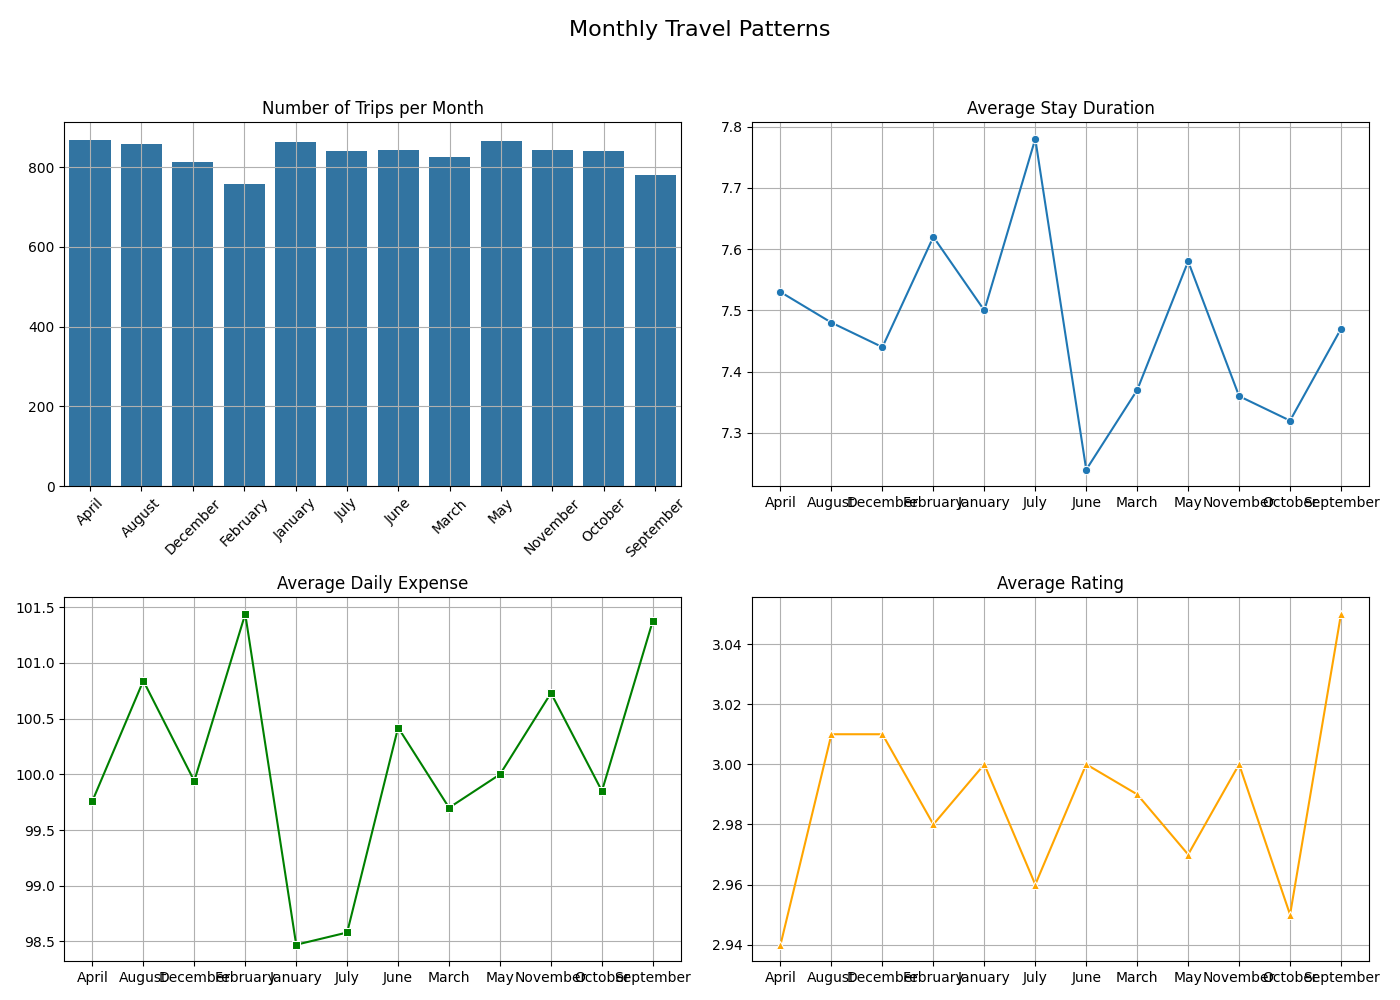

In [3]:
img_path = os.path.join(output_dir, 'most_popular_months.png')
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print('Imagen de patrones estacionales no encontrada:', img_path)

## Destinos más populares
Gráfico de barras horizontales que muestra las 10 ciudades más visitadas.

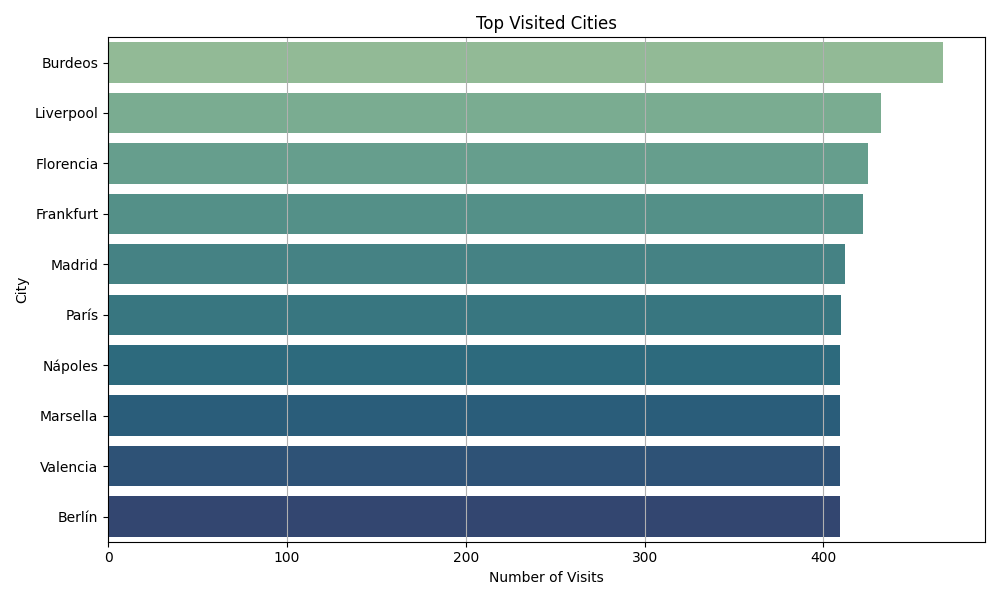

In [4]:
img_path = os.path.join(output_dir, 'most_visited_cities.png')
if os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print('Imagen de destinos más populares no encontrada:', img_path)

## Relación entre tipo de alojamiento y gasto diario
Diagrama de caja (boxplot) que muestra la distribución del gasto diario para cada tipo de alojamiento.

[✓] Chart saved to: /Users/mateo/Downloads/EA2/docs/expense_boxplot_by_accommodation_type.png


/Users/mateo/Downloads/EA2/src/infrastructure/accommodation/get_expense_boxplot_by_accommodation_type_csv.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tipo_alojamiento', y='gasto_diario', palette="Set2")


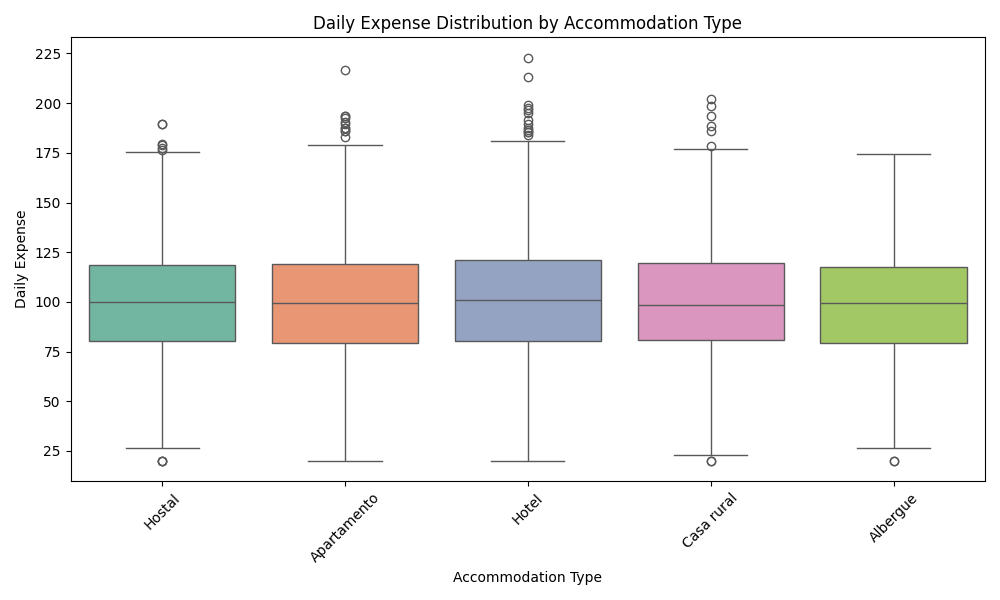

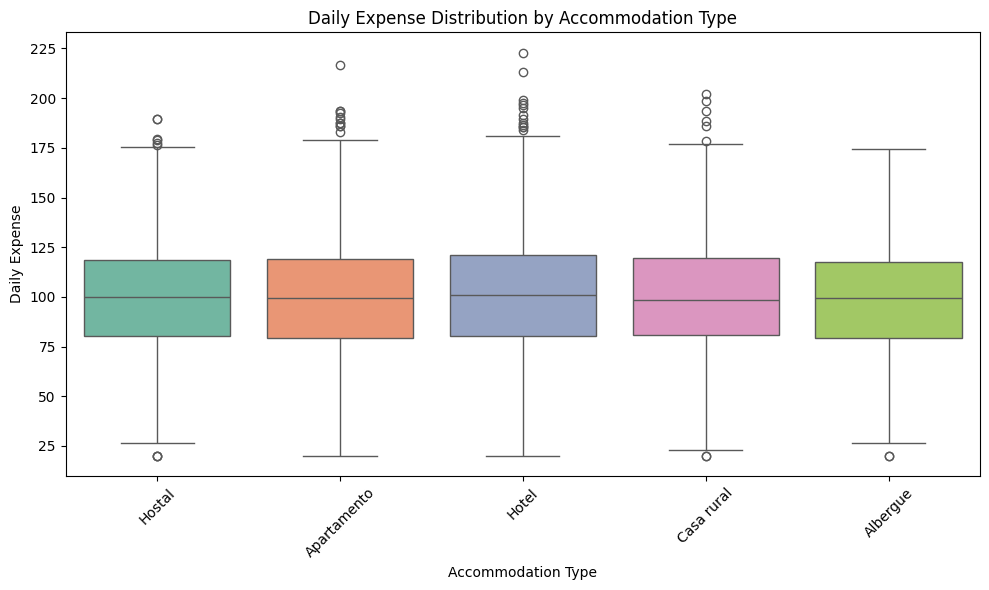

In [5]:
# Generar y mostrar boxplot de gasto diario por tipo de alojamiento
boxplot_expense_repo = GetExpenseBoxplotByAccommodationTypeCSV(csv_path=dataset_path, output_dir=output_dir)
boxplot_expense_use_case = GetExpenseBoxplotByAccommodationTypeUseCase(boxplot_expense_repo)
boxplot_expense_use_case.execute()
img_path = os.path.join(output_dir, 'expense_boxplot_by_accommodation_type.png') if os.path.exists(os.path.join(output_dir, 'expense_boxplot_by_accommodation_type.png')) else None
if img_path and os.path.exists(img_path):
    display(Image(filename=img_path))
else:
    print('Imagen de boxplot de gasto diario no encontrada.')

## Satisfacción del cliente por país
Diagrama de caja interactivo que muestra la distribución de las valoraciones para cada país.

[✓] Chart saved to: /Users/mateo/Downloads/EA2/docs/boxplot_rating_by_country.png
Visualización interactiva de valoraciones no encontrada.


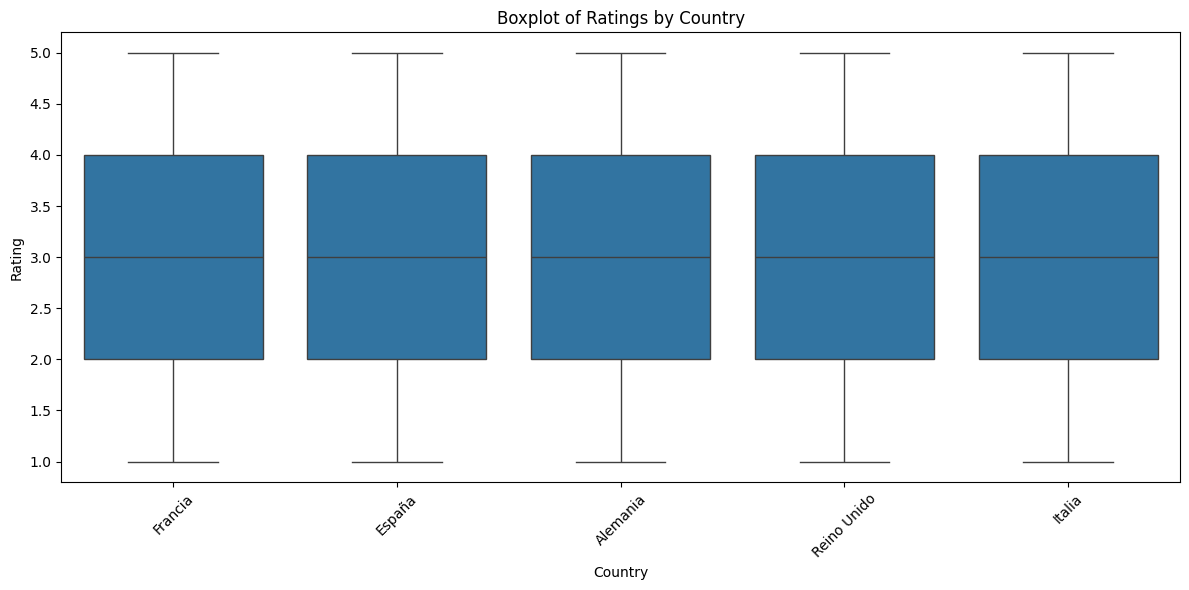

In [6]:
# Generar y mostrar boxplot interactivo de valoraciones por país
boxplot_rating_repo = GetRatingBoxplotByCountryCSV(csv_path=dataset_path, output_dir=output_dir)
boxplot_rating_use_case = GetRatingBoxplotByCountryUseCase(boxplot_rating_repo)
boxplot_rating_use_case.execute()
html_path = os.path.join(output_dir, 'rating_boxplot_by_country.html')
if os.path.exists(html_path):
    display(IFrame(src=html_path, width='100%', height='500px'))
else:
    # Si sólo existe imagen estática
    img_path = os.path.join(output_dir, 'rating_boxplot_by_country.png')
    if os.path.exists(img_path):
        display(Image(filename=img_path))
    else:
        print('Visualización interactiva de valoraciones no encontrada.')

## Duración promedio de estancia por destino
Gráfico de barras interactivo que muestra la duración promedio de la estancia para cada ciudad.

In [7]:
from plotly.offline import iplot
import plotly.express as px

# Obtener datos de duración promedio por ciudad
stay_repo = GetAverageStayByCityCSV(csv_path=dataset_path, output_dir=output_dir)
stay_use_case = GetAverageStayByCityUseCase(stay_repo)
average_stays = stay_use_case.execute()

import pandas as pd
df_stays = pd.DataFrame(list(average_stays.items()), columns=['Ciudad', 'Duración Promedio'])
fig = px.bar(df_stays.sort_values('Duración Promedio', ascending=False), x='Ciudad', y='Duración Promedio', title='Duración Promedio de Estancia por Ciudad')
iplot(fig)


[✓] Chart saved to: /Users/mateo/Downloads/EA2/docs/average_stay_by_city.png


## Distribución geográfica de los viajes
Mapa interactivo que muestra la ubicación de cada viaje, con color por país y tamaño por duración de estancia.

In [8]:
# Generar y mostrar mapa interactivo
map_repo = GetTravelGeoDistributionCSV(csv_path=dataset_path, output_dir=output_dir)
map_use_case = GetTravelGeoDistributionUseCase(map_repo)
map_use_case.execute()
html_map_path = os.path.join(output_dir, 'travel_geo_distribution.html')
if os.path.exists(html_map_path):
    display(IFrame(src=html_map_path, width='100%', height='600px'))
else:
    print('Mapa interactivo no encontrado.')

[✓] Interactive map saved to: /Users/mateo/Downloads/EA2/docs/geo_distribution_map.html
Mapa interactivo no encontrado.


## Duración promedio de estancia por país
Gráfico de barras que muestra la duración promedio de estancia por país.

In [9]:
# Obtener y mostrar duración promedio por país
longest_repo = GetLongestStaysByDestinationCSV(csv_path=dataset_path, output_dir=output_dir)
longest_use_case = GetLongestStaysByDestinationUseCase(longest_repo)
longest_stays = longest_use_case.execute()
df_longest = pd.DataFrame(list(longest_stays.items()), columns=['País', 'Duración Promedio'])
fig2 = px.bar(df_longest.sort_values('Duración Promedio', ascending=False), x='País', y='Duración Promedio', title='Duración Promedio por País')
iplot(fig2)


[✓] Chart saved to: /Users/mateo/Downloads/EA2/docs/longest_stays_by_country.png
